# Analysis of block utilization

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(lubridate, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

## Block statistics

In [2]:
blockStats <- fread("block-stats.tsv.gz", stringsAsFactors=TRUE)
colnames(blockStats) <- c(
    "Block hash", 
    "Block no", 
    "Epoch no",
    "Slot no",
    "Timestamp",
    "Transaction count",
    "Block size [B]",
    "Maximum block size [B]",
    "Plutus memory [8B]",
    "Maximum plutus memory [8B]",
    "Plutus steps [ps]",
    "Maximum plutus steps [ps]"
)
blockStats %>% summary

                                                            Block hash     
 0000010581c9e6dd574a1c0c2d087e54d6012d773eac3cd0f67e4b40109e28ae:      1  
 000003b6bbc9fbc1cde9bd40dd9c2f0a4aae216e7b0de4da85fa29cae90c670f:      1  
 000006b43b09bb97ce484ad7b2c1d6f68167656d9f7525898e9d4cc70136e9c6:      1  
 000007e0e18622965f8b7d741da23cb631f2aaa5830c3259d2185e743ec14f44:      1  
 000009a39da244fe4fa71fb6d803c56b813373f7ca2a11bfc54c6ea950cb7c24:      1  
 00000ac813d4152a792610999e890ba56c58cec5a5c299754fc0b12ce8ca33d6:      1  
 (Other)                                                         :8323883  
    Block no           Epoch no        Slot no         
 Min.   : 4490511   Min.   :208.0   Min.   :  4492800  
 1st Qu.: 6571483   1st Qu.:305.0   1st Qu.: 46789323  
 Median : 8652455   Median :406.0   Median : 90044037  
 Mean   : 8652455   Mean   :405.1   Mean   : 89843012  
 3rd Qu.:10733427   3rd Qu.:504.0   3rd Qu.:132689734  
 Max.   :12814399   Max.   :602.0   Max.   :174935704  


In [3]:
blockUtilization <-
    blockStats[, .(
        `Year`=year(`Timestamp`),
        `Block no`,
        `Slot no`,
        `Transaction count`,
        `Block utilization [%]`=100*`Block size [B]`/`Maximum block size [B]`,
        `Plutus memory [%]`=100*`Plutus memory [8B]`/`Maximum plutus memory [8B]`,
        `Plutus steps [%]`=100*`Plutus steps [ps]`/`Maximum plutus steps [ps]`
    )]
blockUtilization %>% summary

      Year         Block no           Slot no          Transaction count
 Min.   :2020   Min.   : 4490511   Min.   :  4492800   Min.   :  0.00   
 1st Qu.:2021   1st Qu.: 6571483   1st Qu.: 46789323   1st Qu.:  3.00   
 Median :2023   Median : 8652455   Median : 90044037   Median :  9.00   
 Mean   :2023   Mean   : 8652455   Mean   : 89843012   Mean   : 13.78   
 3rd Qu.:2024   3rd Qu.:10733427   3rd Qu.:132689734   3rd Qu.: 20.00   
 Max.   :2025   Max.   :12814399   Max.   :174935704   Max.   :385.00   
                                                                        
 Block utilization [%] Plutus memory [%] Plutus steps [%] 
 Min.   : 0.00444      Min.   :  0.0     Min.   :  0.0    
 1st Qu.: 2.69928      1st Qu.:  1.1     1st Qu.:  0.9    
 Median :14.67285      Median :  9.3     Median :  8.0    
 Mean   :29.17789      Mean   : 17.8     Mean   : 13.9    
 3rd Qu.:47.63406      3rd Qu.: 27.1     3rd Qu.: 21.9    
 Max.   :98.82702      Max.   :100.0     Max.   :100.0    
   

### Size

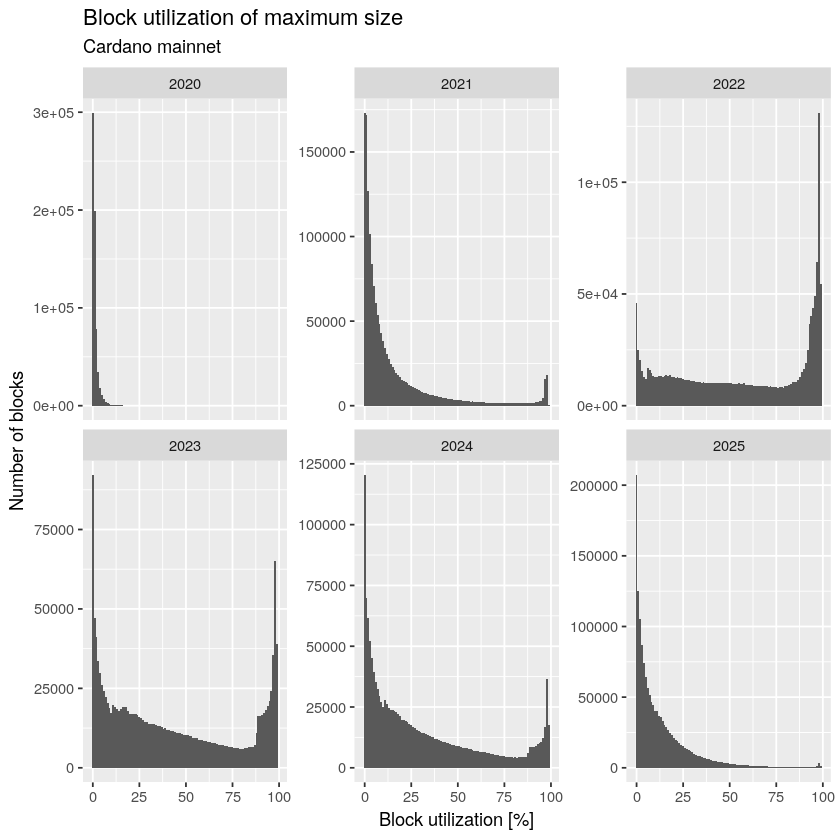

In [4]:
ggplot(blockUtilization, aes(x=`Block utilization [%]`)) +
    geom_histogram(bins=100) +
    facet_wrap(`Year` ~ ., scales="free_y") +
    ylab("Number of blocks") +
    ggtitle(
        "Block utilization of maximum size",
        "Cardano mainnet"
    )

In [5]:
ggsave("block-size.png", units="in", dpi=150, width=8, height=6)

In [6]:
ggsave("block-size.svg", units="in", dpi=150, width=8, height=6)

### Plutus memory

Warning message:
“Removed 1745549 rows containing non-finite values (`stat_bin()`).”


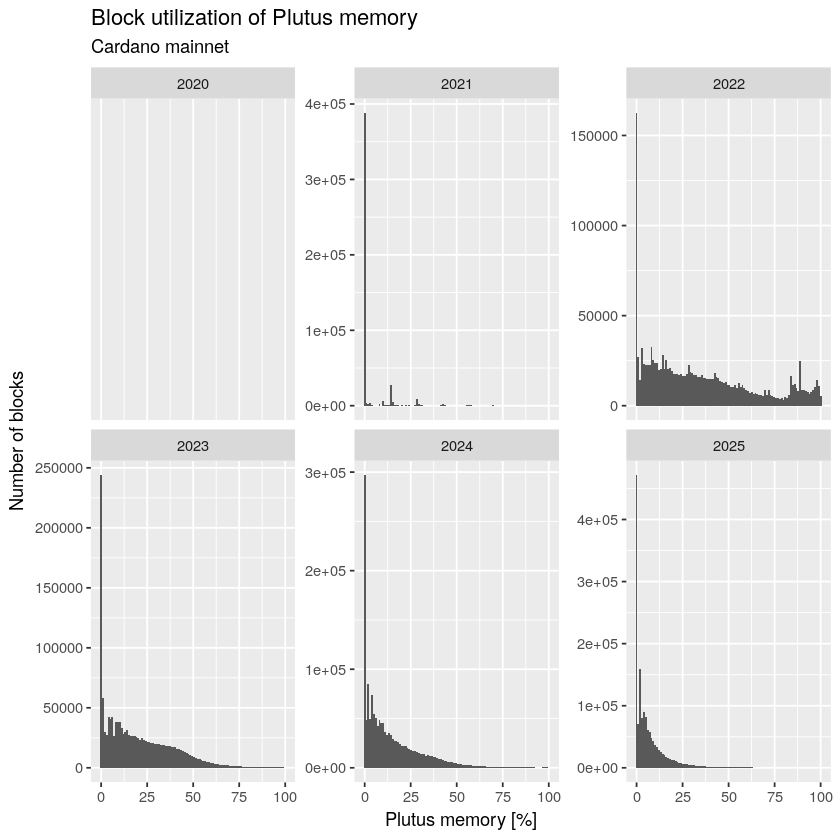

In [7]:
ggplot(blockUtilization, aes(x=`Plutus memory [%]`)) +
    geom_histogram(bins=100) +
    facet_wrap(`Year` ~ ., scales="free_y") +
    ylab("Number of blocks") +
    ggtitle(
        "Block utilization of Plutus memory",
        "Cardano mainnet"
    )

In [8]:
ggsave("block-memory.png", units="in", dpi=150, width=8, height=6)

Warning message:
“Removed 1745549 rows containing non-finite values (`stat_bin()`).”


In [9]:
ggsave("block-memory.svg", units="in", dpi=150, width=8, height=6)

Warning message:
“Removed 1745549 rows containing non-finite values (`stat_bin()`).”


### Plutus steps

Warning message:
“Removed 1745549 rows containing non-finite values (`stat_bin()`).”


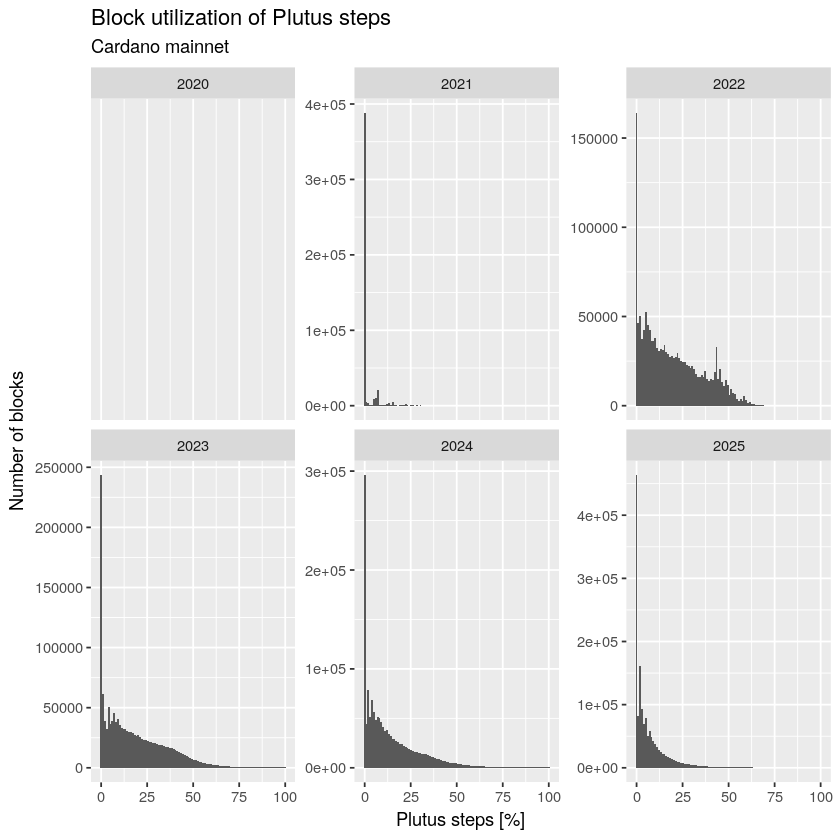

In [10]:
ggplot(blockUtilization, aes(x=`Plutus steps [%]`)) +
    geom_histogram(bins=100) +
    facet_wrap(`Year` ~ ., scales="free_y") +
    ylab("Number of blocks") +
    ggtitle(
        "Block utilization of Plutus steps",
        "Cardano mainnet"
    )

In [11]:
ggsave("block-steps.png", units="in", dpi=150, width=8, height=6)

Warning message:
“Removed 1745549 rows containing non-finite values (`stat_bin()`).”


In [12]:
ggsave("block-steps.svg", units="in", dpi=150, width=8, height=6)

Warning message:
“Removed 1745549 rows containing non-finite values (`stat_bin()`).”
